In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
import numpy as np



In [ ]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [ ]:
titanic_data=pd.read_csv('C:/Users/ilyuha/Downloads/train.csv')


In [ ]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
from IPython.display import HTML
style="<style>svg{width:30% !important; height:30% !important;}</style>"

In [ ]:
X= titanic_data.drop(['PassengerId','Survived','Name','Ticket','Cabin'], axis=1)
y= titanic_data.Survived

In [ ]:
X = pd.get_dummies(X)


In [ ]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [ ]:
X =X.fillna({'Age': X.Age.median()})
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [ ]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [ ]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [ ]:
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

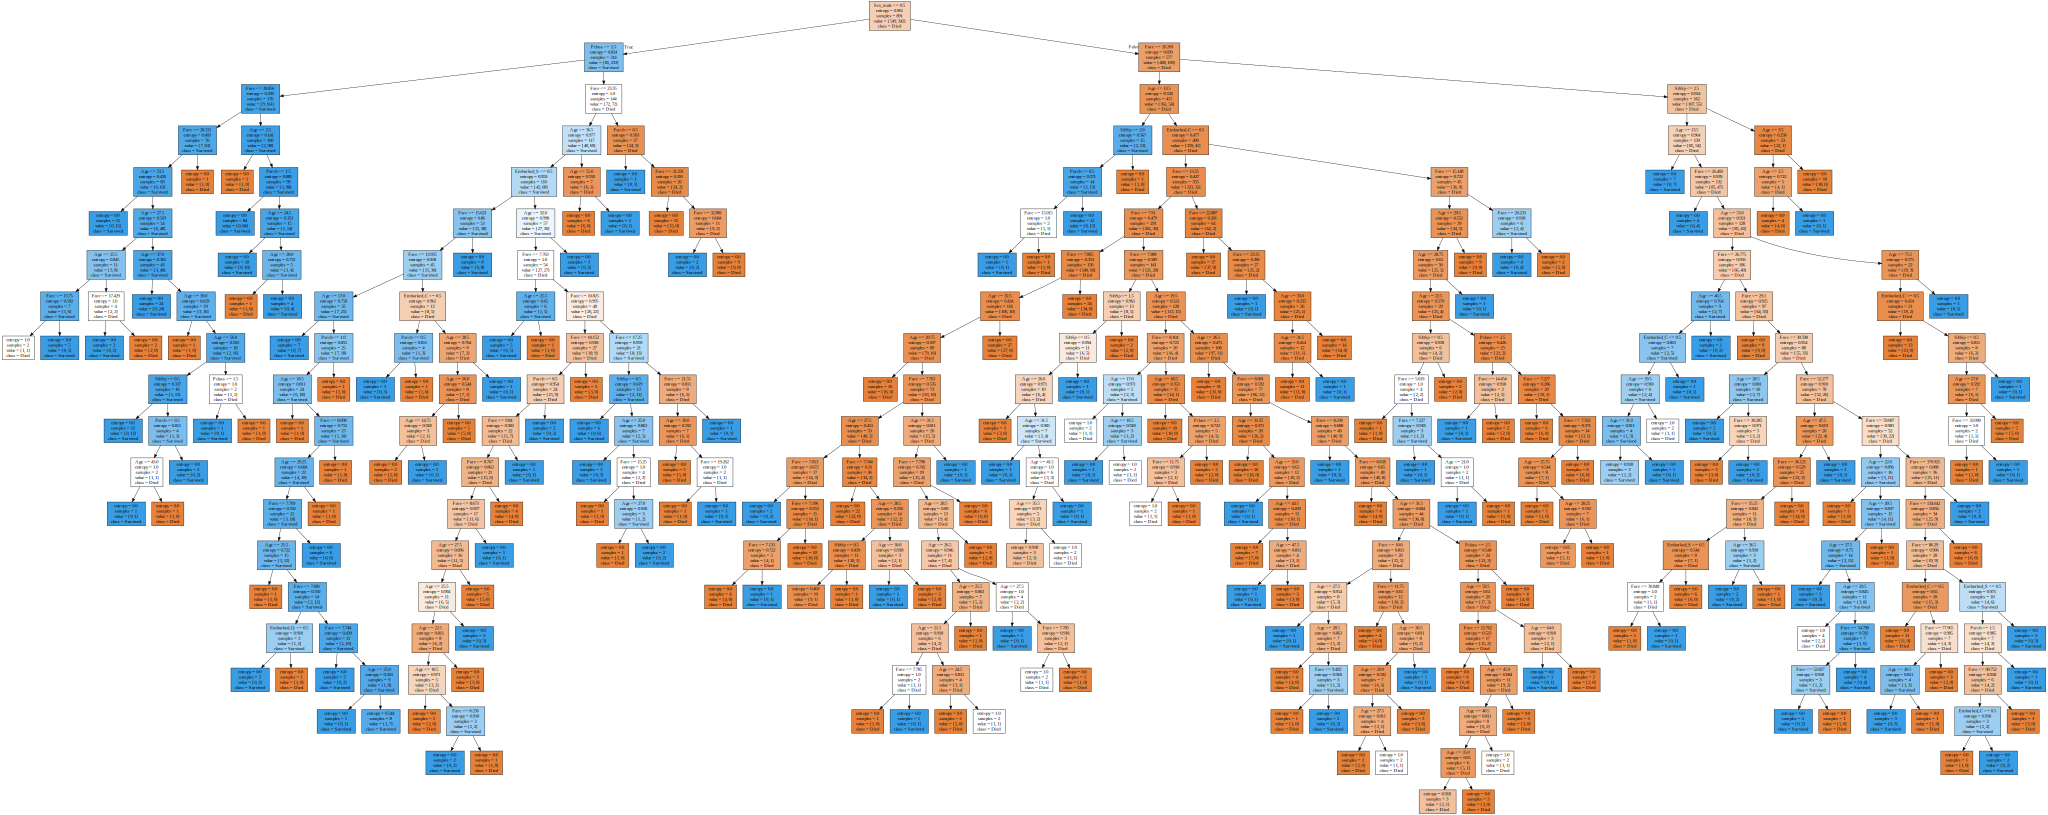

In [ ]:
graph = Source(tree.export_graphviz(clf, out_file=None, feature_names=list(X),
     class_names =['Died', 'Survived'], filled=True))
display(SVG(graph.pipe(format='svg')))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [ ]:
clf.score(X,y)

0.9797979797979798

In [ ]:
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [ ]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [ ]:
clf.score(X_train,y_train)

0.8238255033557047

In [ ]:
clf.score(X_test,y_test)

0.8203389830508474

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score(clf, X_train, y_train, cv=5).mean()

0.7886780135783127

In [ ]:
max_depth_values = range(1, 100)

In [ ]:
scores_data = pd.DataFrame()
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score=cross_val_score(clf,X_train, y_train, cv=5).mean()
    
    temp_score_data=pd.DataFrame({   'max_depth': [max_depth],
                                    'train_score': [train_score],
                                     'test_score':[test_score],
                                     'cross_val_score': [mean_cross_val_score]})
    scores_data=scores_data.append(temp_score_data)

In [ ]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781857
0,2,0.805369,0.776271,0.768553
0,3,0.823826,0.820339,0.788678
0,4,0.833893,0.823729,0.783580
0,5,0.840604,0.806780,0.798622


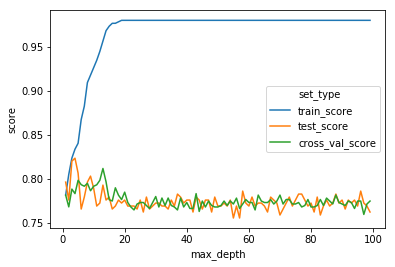

In [ ]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score', 'cross_val_score'],
                           var_name='set_type', value_name='score')
sns.lineplot(x="max_depth", y="score", hue="set_type", data=scores_data_long)

In [ ]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


In [ ]:
scores_data_long.query("set_type=='cross_val_score'").head(20)

,max_depth,set_type,score
198,1,cross_val_score,0.781857
199,2,cross_val_score,0.768553
200,3,cross_val_score,0.788678
201,4,cross_val_score,0.783580
202,5,cross_val_score,0.798622
203,6,cross_val_score,0.793693
204,7,cross_val_score,0.791956
205,8,cross_val_score,0.795218
206,9,cross_val_score,0.786814
207,10,cross_val_score,0.791871


In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
best_clf= tree.DecisionTreeClassifier(criterion='entropy',max_depth=10)

In [ ]:
cross_val_score(clf, X_test, y_test, cv=5).mean()

0.8

In [ ]:
# делаем лругим способом,что сделали ранее

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
clf= tree.DecisionTreeClassifier()
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [ ]:
parametrs= {'criterion':['gini','entropy'], 'max_depth':range(1,30)}

In [ ]:
grid_search_cv_clf=GridSearchCV(clf,parametrs, cv=5)

In [ ]:
grid_search_cv_clf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': range(1, 30)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [ ]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 10}

In [ ]:
best_clf=grid_search_cv_clf.best_estimator_


In [ ]:
best_clf.score(X_test,y_test)

0.7966101694915254

In [ ]:
from sklearn.metrics import precision_score, recall_score


In [ ]:
y_pred=best_clf.predict(X_test)

In [ ]:
precision_score(y_test, y_pred, average='macro')  

0.7990003107842122

In [ ]:
recall_score(y_test, y_pred,)

0.6583333333333333

In [ ]:
y_predicted_prob=best_clf.predict_proba(X_test)

In [ ]:
y_predicted_prob[:, 1]    # отбираем только вторую колонку

array([0.44444444, 0.25      , 0.06086957, 1.        , 1.        ,
       0.        , 0.75      , 0.06086957, 0.75      , 1.        ,
       1.        , 0.12      , 0.        , 0.13333333, 0.12      ,
       1.        , 0.        , 0.33333333, 0.06086957, 0.        ,
       0.06086957, 0.36842105, 0.33333333, 0.06086957, 0.06086957,
       0.        , 0.36842105, 0.25      , 0.        , 0.33333333,
       0.06086957, 1.        , 0.36842105, 1.        , 0.06086957,
       0.44444444, 0.36842105, 0.75      , 1.        , 0.06086957,
       0.        , 0.18181818, 0.06086957, 0.18181818, 0.        ,
       0.06086957, 0.06086957, 0.06086957, 0.18181818, 0.        ,
       1.        , 1.        , 0.        , 1.        , 0.        ,
       1.        , 0.25      , 0.        , 1.        , 0.33333333,
       0.18181818, 1.        , 1.        , 0.        , 0.18181818,
       1.        , 0.        , 0.06086957, 0.13333333, 1.        ,
       0.        , 1.        , 1.        , 1.        , 0.06086

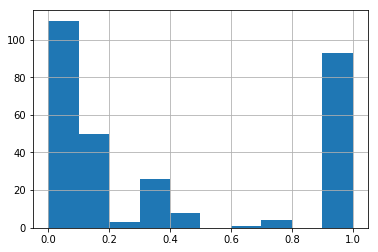

In [ ]:
pd.Series(y_predicted_prob[:, 1]).hist()

In [ ]:
## Перерасчитываем y_pred

In [ ]:
y_pred=np.where(y_predicted_prob[:, 1] > 0.8,1, 0) ## если >0.8,тогда 1.иначе 0


In [ ]:
pd.Series(y_predicted_prob[:, 1]).unique()

array([0.44444444, 0.25      , 0.06086957, 1.        , 0.        ,
       0.75      , 0.12      , 0.13333333, 0.33333333, 0.36842105,
       0.18181818, 0.66666667])

In [ ]:
precision_score(y_test, y_pred)  

0.5567567567567567

In [ ]:
recall_score(y_test, y_pred,)

0.8583333333333333

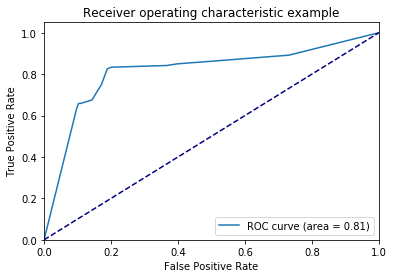

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#max_depth=3 значит что будет 3 ответвления дерева
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
#чтобы вызвать данные по значимости для работы с ними(взято из конца урока)
best_clf.feature_importances_

array([0.11570001, 0.112605  , 0.03978202, 0.02952254, 0.14343179,
       0.18981872, 0.32089649, 0.0239919 , 0.00792624, 0.01632529])

In [ ]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

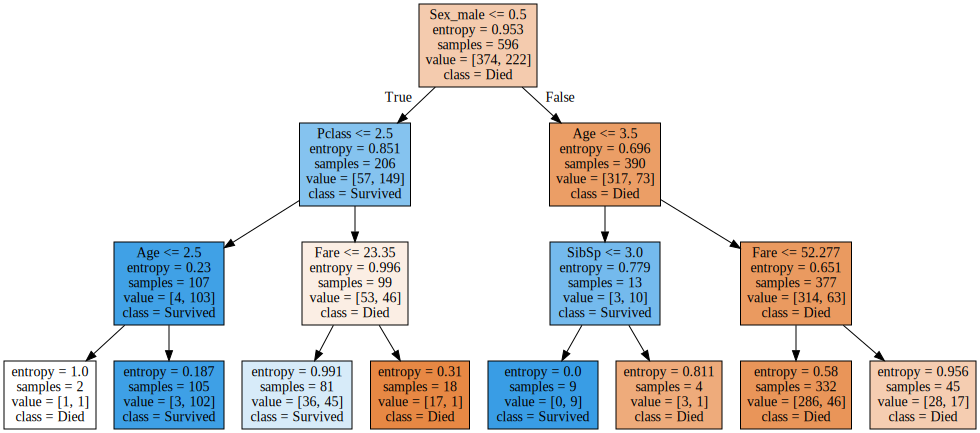

In [ ]:
graph = Source(tree.export_graphviz(clf, out_file=None, feature_names=list(X),
     class_names =['Died', 'Survived'], filled=True))
display(SVG(graph.pipe(format='svg')))

In [ ]:
#min_samples_split=100 -нет разбиений,если в выборке меньше 100 наблюдений
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=100)

In [ ]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=100,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

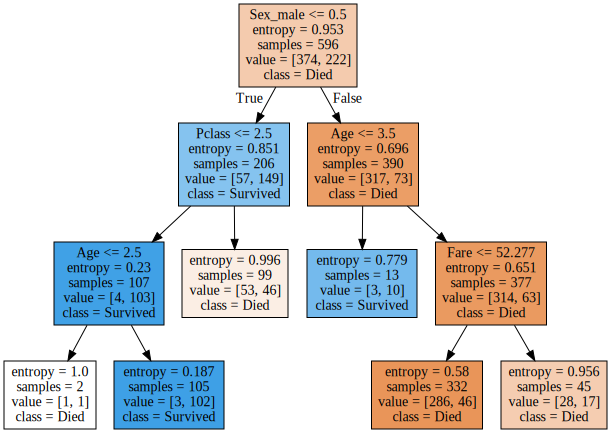

In [ ]:
graph = Source(tree.export_graphviz(clf, out_file=None, feature_names=list(X),
     class_names =['Died', 'Survived'], filled=True))
display(SVG(graph.pipe(format='svg')))

In [ ]:
#min_samples_leaf-фильтр количества наблюдений(не меньше 10)
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=100, min_samples_leaf=10)

In [ ]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=100,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

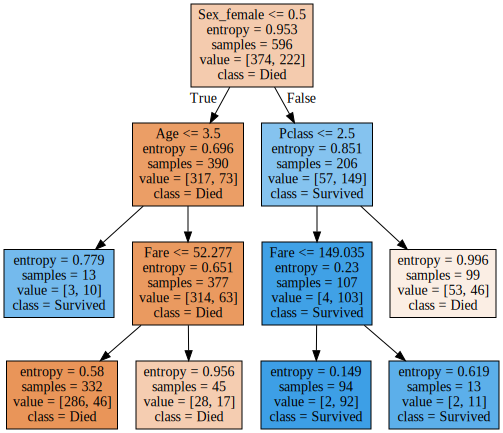

In [ ]:
graph = Source(tree.export_graphviz(clf, out_file=None, feature_names=list(X),
     class_names =['Died', 'Survived'], filled=True))
display(SVG(graph.pipe(format='svg')))

In [ ]:
# Обучаемый рандомный лес
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf_rf = RandomForestClassifier()


In [ ]:
clf_rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [ ]:
parametrs = {'n_estimators': [10, 20, 30], 'max_depth': [2, 5, 7, 10]}

In [ ]:
grid_search_cv_clf=GridSearchCV(clf_rf,parametrs, cv=5)

In [ ]:
grid_search_cv_clf.fit(X_train,y_train) 

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 20, 30], 'max_depth': [2, 5, 7, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [ ]:
grid_search_cv_clf.best_params_

{'max_depth': 5, 'n_estimators': 30}

In [ ]:
best_clf = grid_search_cv_clf.best_estimator_

In [ ]:
best_clf.score(X_test,y_test)

0.823728813559322

In [ ]:
best_clf.feature_importances_

array([0.11570001, 0.112605  , 0.03978202, 0.02952254, 0.14343179,
       0.18981872, 0.32089649, 0.0239919 , 0.00792624, 0.01632529])

In [ ]:
feature_importances=best_clf.feature_importances_

In [ ]:
#при помощи list достаём переменную 
feature_importances_df = pd.DataFrame({'features': list(X_train),
                                        'feature_importances': feature_importances})

In [ ]:
feature_importances_df

,features,feature_importances
0,Pclass,0.115700
1,Age,0.112605
2,SibSp,0.039782
3,Parch,0.029523
4,Fare,0.143432
5,Sex_female,0.189819
6,Sex_male,0.320896
7,Embarked_C,0.023992
8,Embarked_Q,0.007926
9,Embarked_S,0.016325


In [ ]:
# ascending=False -по убыванию, True-по возрастанию
feature_importances_df.sort_values('feature_importances', ascending=False)

,features,feature_importances
6,Sex_male,0.320896
5,Sex_female,0.189819
4,Fare,0.143432
0,Pclass,0.115700
1,Age,0.112605
2,SibSp,0.039782
3,Parch,0.029523
7,Embarked_C,0.023992
9,Embarked_S,0.016325
8,Embarked_Q,0.007926
